In [1]:
# import libraries
import numpy as np
import pandas as pd
#import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # filter some warning messages


In [2]:
# plot MHW (2014-2016) for the NEP and QIN regions for report

In [3]:
lpd = '/Users/sol/Documents/LargeData/QIN/Glorys_Model/'
# regional domain
ldom = np.array([[43, 48.5],[-129, -123]]) # 230, 237
lqin = np.array([[46.25, 47.75],[-125.5, -123.5]]) # 230, 237 # domain for zoom in map
# QIN region
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]]) 
# calendar.month_name[mon]

In [4]:
ds = xr.open_dataset('../data/blob_oct2014_forQIN.nc')
ds.close()
ds.coords['lon'] = np.mod(ds.coords['lon'] + 180,360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (lat: 100, lon: 120)
Coordinates:
  * lat      (lat) float32 30.125 30.375 30.625 30.875 ... 54.375 54.625 54.875
  * lon      (lon) float32 -149.875 -149.625 -149.375 ... -120.375 -120.125
    zlev     float32 0.0
Data variables:
    anom     (lat, lon) float32 0.98064524 1.0270969 1.1135484 ... nan nan nan

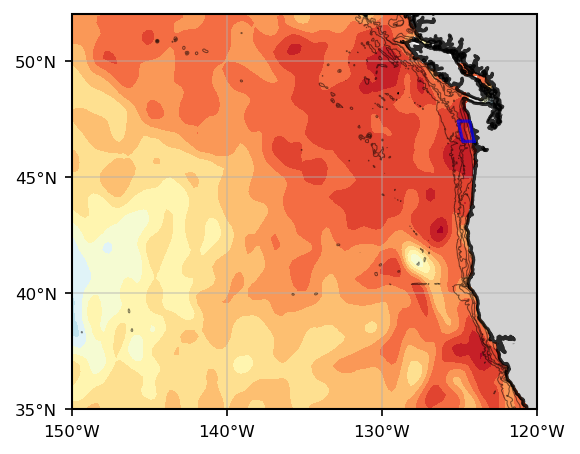

In [5]:
comap='RdYlBu_r'
cd = 'b'
dom = np.array([[35, 52],[-150, -120]])
cbs=True
tit='SSTa (C)'

fn = '/Users/sol/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(dom[0,0],dom[0,1]),x=slice(dom[1,0],dom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

if cbs==True:
    fig=plt.figure(figsize=(4,4),dpi=150)
    
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.set_extent([dom[1,0],dom[1,1],dom[0,0],dom[0,1]],crs=ccrs.PlateCarree())
if dom[1,1]-dom[1,0]>3:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,10)
else:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,2)
if dom[0,1]-dom[0,0]>3:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,5)
else:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,5)

ax.set_xticks(xt, crs=ccrs.PlateCarree())
ax.set_yticks(yt, crs=ccrs.PlateCarree())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-2000,-1000,-500,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.contourf(ds.lon, ds.lat,ds.anom, cmap=comap, vmin=-3, vmax=3,levels=10)
#if cbs==True:
#    cb = plt.colorbar(fraction=0.015)
#    cb.ax.tick_params(labelsize='x-small')
#cb.set_label(label=tit, size='x-small')#, weight='bold')
plt.plot(qbox[0,:],qbox[1,:],c='b',lw=1.5,zorder=5, alpha=0.7)
#plt.colorbar(fraction=0.03)
plt.tight_layout(h_pad=1)
plt.show()

In [6]:
fn = '../data/ETOPO1_QIN.nc'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
X,Y=np.meshgrid(topo.x,topo.y)


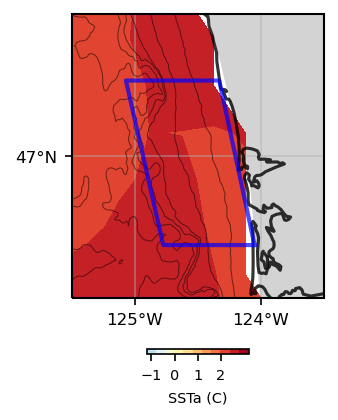

In [7]:
comap='RdYlBu_r'
cd = 'b'

cbs=False
tit='SSTa (C)'

if cbs==True:
    fig=plt.figure(figsize=(4,4),dpi=150)
    dom = ldom
else:
    fig=plt.figure(figsize=(3,3),dpi=150)
    dom = lqin
    

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.set_extent([dom[1,0],dom[1,1],dom[0,0],dom[0,1]],crs=ccrs.PlateCarree())
if dom[1,1]-dom[1,0]>3:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,3)
else:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,1)
if dom[0,1]-dom[0,0]>3:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,2)
else:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,1)

ax.set_xticks(xt, crs=ccrs.PlateCarree())
ax.set_yticks(yt, crs=ccrs.PlateCarree())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
ax.set_aspect(1.5)
plt.contour(X,Y,topo,[-3000,-2000,-1000,-500,-200,-150, -100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.plot(qbox[0,:],qbox[1,:],c='b',lw=2,zorder=5, alpha=0.7)

plt.contourf(ds.lon, ds.lat, ds.anom, cmap=comap, vmin=-3, vmax=3,levels=10)

if cbs==False:
    cb = plt.colorbar(fraction=0.015, orientation='horizontal', ticks=[*range(-3,3,1)])
    cb.ax.tick_params(labelsize='x-small')
    cb.set_label(label=tit, size='x-small')#, weight='bold')

plt.tight_layout(h_pad=1)
plt.show()